# EasyOCR (Optical Character Recognition) on bacalhau

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bacalhau-project/examples/blob/main/model-inference/EasyOCR/index.ipynb)
[![Open In Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/bacalhau-project/examples/HEAD?labpath=model-inference/EasyOCR/index.ipynb)

## Introduction

EasyOCR is a ready-to-use OCR with 80+ supported languages and all popular writing scripts including Latin, Chinese, Arabic, Devanagari, Cyrillic and etc. it is developed by https://www.jaided.ai/


![](https://github.com/JaidedAI/EasyOCR/raw/master/examples/example2.png)


EasyOCR is leveraging recent works in academic and other open source projects to create a ready-to-use product with state-of-the-art performance. 
with easy OCR you use the pretrained models or use your own fine tuned model 

It can be used to digitalize paper records or for recognizing characters in images stored on IPFS/Filecoin or on the web

## Running Locally​


Installing dependencies

In [ ]:
%%bash
pip install easyocr

     |████████████████████████████████| 63.2MB 114kB/s 


load example images

In [ ]:
%%bash
npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 2.792s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#HEAD


list them

In [ ]:
%%bash
ls -l

total 3508
-rw-r--r-- 1 root root   59898 Jun 16 22:36 chinese.jpg
-rw-r--r-- 1 root root   97910 Jun 16 22:36 easyocr_framework.jpeg
-rw-r--r-- 1 root root 1740957 Jun 16 22:36 english.png
-rw-r--r-- 1 root root  487995 Jun 16 22:36 example2.png
-rw-r--r-- 1 root root  127454 Jun 16 22:36 example3.png
-rw-r--r-- 1 root root  488641 Jun 16 22:36 example.png
-rw-r--r-- 1 root root  168376 Jun 16 22:36 french.jpg
-rw-r--r-- 1 root root   42159 Jun 16 22:36 japanese.jpg
-rw-r--r-- 1 root root  225531 Jun 16 22:36 korean.png
drwxr-xr-x 1 root root    4096 Jun 15 13:37 sample_data
-rw-r--r-- 1 root root   82229 Jun 16 22:36 thai.jpg
-rw-r--r-- 1 root root   34706 Jun 16 22:36 width_ths.png


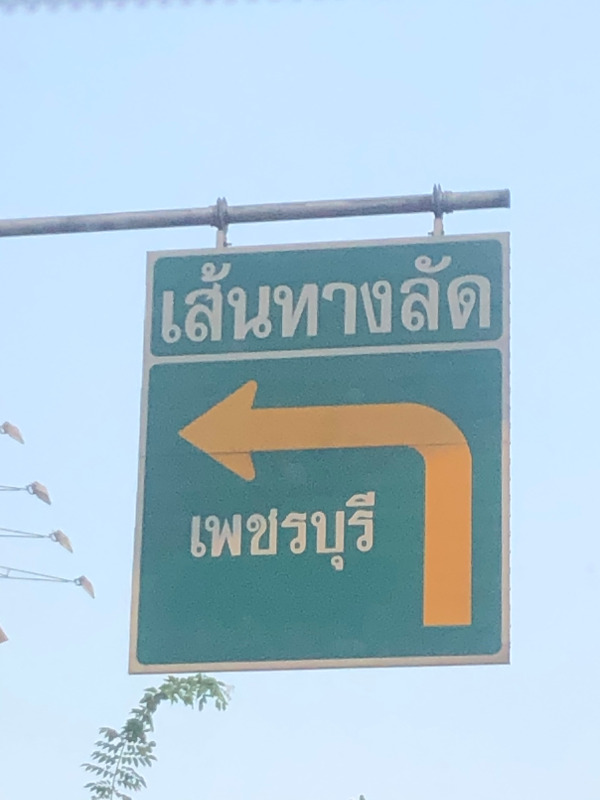

In [ ]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("thai.jpg")
im

In [ ]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['th','en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('thai.jpg')
bounds

we get cordinates which represent a rectangle containing text and the text itself

After that we will build a DOCKERFILE to containernize this script and then run it on bacalhau

# Building docker container (Optional)
Note* you can directly skip to running on bacalhau ands use the prebuild docker image






In this step you will create docker container using the dockerfile in the Easy OCR repo

Steps to build the container

clone the repo
```
git clone https://github.com/JaidedAI/EasyOCR
cd EasyOCR
```
Builing the container


To Build the docker container run the docker build command

```
docker build -t hub-user/repo-name:tag .
```

Please replace

hub-user with your docker hub username, If you don’t have a docker hub account Follow these instructions to create docker account, and use the username of the account you created

repo-name This is the name of the container, you can name it anything you want

tag This is not required but you can use the latest tag

After you have build the container, the next step is to test it locally and then push it docker hub

Now you can push this repository to the registry designated by its name or tag.

```
 docker push hub-user/repo-name:tag
```

After the repo image has been pushed to docker hub, we can now use the container for running on bacalhau

## **Running the container on bacalhau**

After the repo image has been pushed to docker hub, we can now use the container for running on bacalhau


This command is similar to what we have run locally but we change the output directory to the outputs folder so that the results are saved to IPFS


We use the --gpu flag to denote the no of GPU we are going to use

Since the model and the image aren't present in the container we will mount the image from an URL and the model from IPFS

you can find models to download from here
https://www.jaided.ai/easyocr/modelhub/

choose the model you want to use in this case we will be using the zh_sim_g2 model


In [ ]:
!curl -sL https://get.bacalhau.org/install.sh | bash

Your system is linux_amd64
No BACALHAU detected. Installing fresh BACALHAU CLI...
Getting the latest BACALHAU CLI...
Installing v0.3.11 BACALHAU CLI...
Verified OK
Extracting tarball ...
NOT verifying Bin
bacalhau installed into /usr/local/bin successfully.
Client Version: v0.3.11
Server Version: v0.3.11


In [ ]:
%%bash --out job_id
bacalhau docker run \
-v bafybeibvcllzpfviggluobcfassm3vy4x2a4yanfxtmn4ir7olyzfrgq64:/root/.EasyOCR/model/zh_sim_g2.pth  \
-u https://raw.githubusercontent.com/JaidedAI/EasyOCR/ae773d693c3f355aac2e58f0d8142c600172f016/examples/chinese.jpg \
--timeout 3600 \
--wait-timeout-secs 3600 \
--gpu 1  \
--id-only \
--wait \
jsacex/easyocr \
--  easyocr -l ch_sim  en -f ./inputs/chinese.jpg --detail=1 --gpu=True


Structure of the command

Mounting the model from IPFS
-v bafybeibvcllzpfviggluobcfassm3vy4x2a4yanfxtmn4ir7olyzfrgq64:/root/.EasyOCR/model/zh_sim_g2.pth 

Mounting the Input Image from a URL
-u https://raw.githubusercontent.com/JaidedAI/EasyOCR/ae773d693c3f355aac2e58f0d8142c600172f016/examples/chinese.jpg

Specifying the no of GPUs
--gpu 1

Name of the Docker Image
jsacex/easyocr

The easyocr command

--  easyocr -l ch_sim  en -f ./inputs/chinese.jpg --detail=1 --gpu=True

-l the name of the model which is ch_sim

-f path to the input Image or directory

--detail=1 level of detail

--gpu=True we set this flag to true since we are running inference on a GPU, if you run this on a CPU you set this to false 


In [ ]:
%env JOB_ID={job_id}

env: JOB_ID=b8267063-37af-4aec-a65d-201a449dec89


In [ ]:
%%bash
bacalhau list --id-filter ${JOB_ID}

 CREATED   ID        JOB                      STATE      VERIFIED  PUBLISHED               
 14:27:53  b8267063  Docker jsacex/easyoc...  Completed            /ipfs/QmaDS3cmVCoUsC... 


Where it says "Completed", that means the job is done, and we can get the results.

To find out more information about your job, run the following command:


In [ ]:
%%bash
bacalhau describe ${JOB_ID}

In [ ]:
%%bash
rm -rf results && mkdir -p results
bacalhau get $JOB_ID --output-dir results

Fetching results of job 'b8267063-37af-4aec-a65d-201a449dec89'...
Results for job 'b8267063-37af-4aec-a65d-201a449dec89' have been written to...
results


2022/11/11 14:28:48 failed to sufficiently increase receive buffer size (was: 208 kiB, wanted: 2048 kiB, got: 416 kiB). See https://github.com/lucas-clemente/quic-go/wiki/UDP-Receive-Buffer-Size for details.


After the download has finished you should see the following contents in results directory

In [ ]:
%%bash
ls results/

combined_results
per_shard
raw


To view the results run the command

```
cat results/combined_results/stdout
```